In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

import time
import psutil

# Read Dataset

In [3]:
train_file_path = '/content/drive/MyDrive/ITU_Competition_Intrusion_and_Vulnerability_Detection_in_Software_Defined_Networks(SDN)/train_data.csv'
test_file_path = '/content/drive/MyDrive/ITU_Competition_Intrusion_and_Vulnerability_Detection_in_Software_Defined_Networks(SDN)/test_data.csv'

train_df = pd.read_csv(train_file_path,skipinitialspace=True)
test_df = pd.read_csv(test_file_path,skipinitialspace=True)

In [29]:
#Split data into X(input features) and Y (labels)
X_train = train_df.drop(train_df.columns[-15:], axis=1)
y_train = train_df[train_df.columns[-15:]]

X_test = test_df.drop(test_df.columns[-15:], axis=1)
y_test = test_df[test_df.columns[-15:]]

features = X_train.columns.tolist()
class_labels = y_train.columns.tolist()
labels = []
for label in class_labels:
    new_label = label.replace("Label_","")
    new_label = new_label.replace("�","")
    new_label = new_label.replace(" ","")
    labels.append(new_label)



In [5]:
print(labels)

['BENIGN', 'Bot', 'DDoS', 'DoSGoldenEye', 'DoSHulk', 'DoSSlowhttptest', 'DoSslowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'WebAttackBruteForce', 'WebAttackSqlInjection', 'WebAttackXSS']


In [6]:
print("Records deleted in training dataset:",train_df.isnull().sum().sum())
print("Records deleted in test dataset:", test_df.isnull().sum().sum())

Records deleted in training dataset: 0
Records deleted in test dataset: 0


# Performance evaluation method

In [7]:
def perf_evaluation(y_true,y_pred,class_labels):
    # Convert one-hot encoded labels to integer labels
    y_true= np.asarray(y_true)
    true_labels_int = np.argmax(y_true, axis=1)
    predicted_labels_int = np.argmax(y_pred, axis=1)

    # # Compute the confusion matrix
    conf_matrix = confusion_matrix(true_labels_int, predicted_labels_int)
    print("Confusion Matrix:")

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(15, 15))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="plasma", square=True,
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Accuracy and Classification Report
    accuracy = accuracy_score(y_true, y_pred) * 100
    print("Total Accuracy: ",accuracy)
    report = classification_report(y_true,y_pred)
    print("Classification Report")
    print(report)


    # Calculate TP, TN, FP, FN for each class
    class_tp = {}
    class_tn = {}
    class_fp = {}
    class_fn = {}

    for i, label in enumerate(class_labels):
        tp = conf_matrix[i, i]
        tn = conf_matrix.sum() - conf_matrix[i, :].sum() - conf_matrix[:, i].sum() + tp
        fp = conf_matrix[:, i].sum() - tp
        fn = conf_matrix[i, :].sum() - tp

        class_tp[label] = tp
        class_tn[label] = tn
        class_fp[label] = fp
        class_fn[label] = fn

    # Print true positives, true negatives, false positives, and false negatives for each class
    for label in class_labels:
        print(f"Class {label}:")
        print("True Positives (TP):", class_tp[label])
        print("True Negatives (TN):", class_tn[label])
        print("False Positives (FP):", class_fp[label])
        print("False Negatives (FN):", class_fn[label])
        print()

# Decision Tree

In [23]:
from tables.tests.common import verbosePrint
# Use 5-fold cross validation
from sklearn import tree
DT_clf = tree.DecisionTreeClassifier()
#kf = KFold(n_splits=5, shuffle=True, random_state=42)
#scores = cross_val_score(DT_clf, X_train, y_train, cv=kf, scoring='accuracy')
#print(scores)

In [27]:
# Train final model
process = psutil.Process()
before_ram = process.memory_info().rss / 1024 / 1024  # RAM usage before training in MB
start_time = time.time()
Dt_clf = DT_clf.fit(X_train, y_train)
end_time = time.time()
after_ram = process.memory_info().rss / 1024 / 1024  # RAM usage after training in MB
dt_training_time = end_time - start_time
dt_ram_consumption = after_ram - before_ram
print("Decision Tree Training Time:", dt_training_time, "seconds")
print("Decision Tree RAM Consumption:", dt_ram_consumption, "MB")
y_pred = DT_clf.predict(X_test) # change to x_test_0

Decision Tree Training Time: 130.6924901008606 seconds
Decision Tree RAM Consumption: 9.78515625 MB


Confusion Matrix:


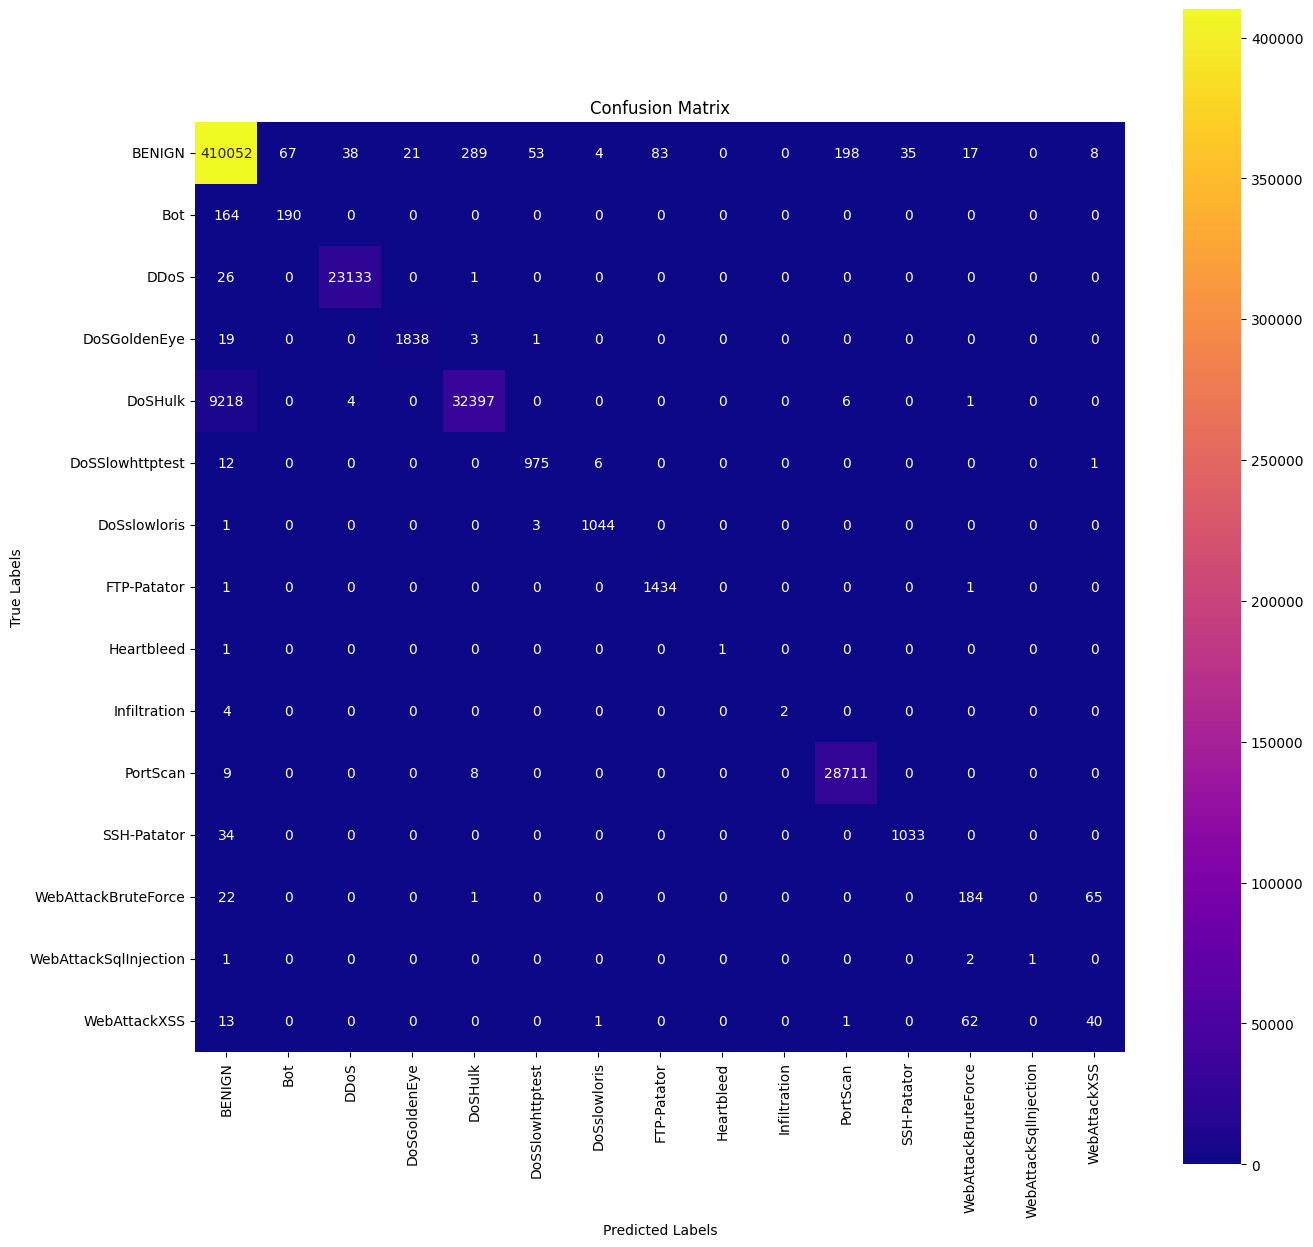

Total Accuracy:  97.94346483168471
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    410865
           1       0.74      0.54      0.62       354
           2       1.00      1.00      1.00     23160
           3       0.99      0.99      0.99      1861
           4       0.99      0.78      0.87     41626
           5       0.94      0.98      0.96       994
           6       0.99      1.00      0.99      1048
           7       0.95      1.00      0.97      1436
           8       1.00      0.50      0.67         2
           9       1.00      0.33      0.50         6
          10       0.99      1.00      1.00     28728
          11       0.97      0.97      0.97      1067
          12       0.69      0.68      0.68       272
          13       1.00      0.25      0.40         4
          14       0.35      0.34      0.35       117

   micro avg       0.98      0.98      0.98    511540
   macro avg       0.90

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
perf_evaluation(y_test,y_pred,labels)

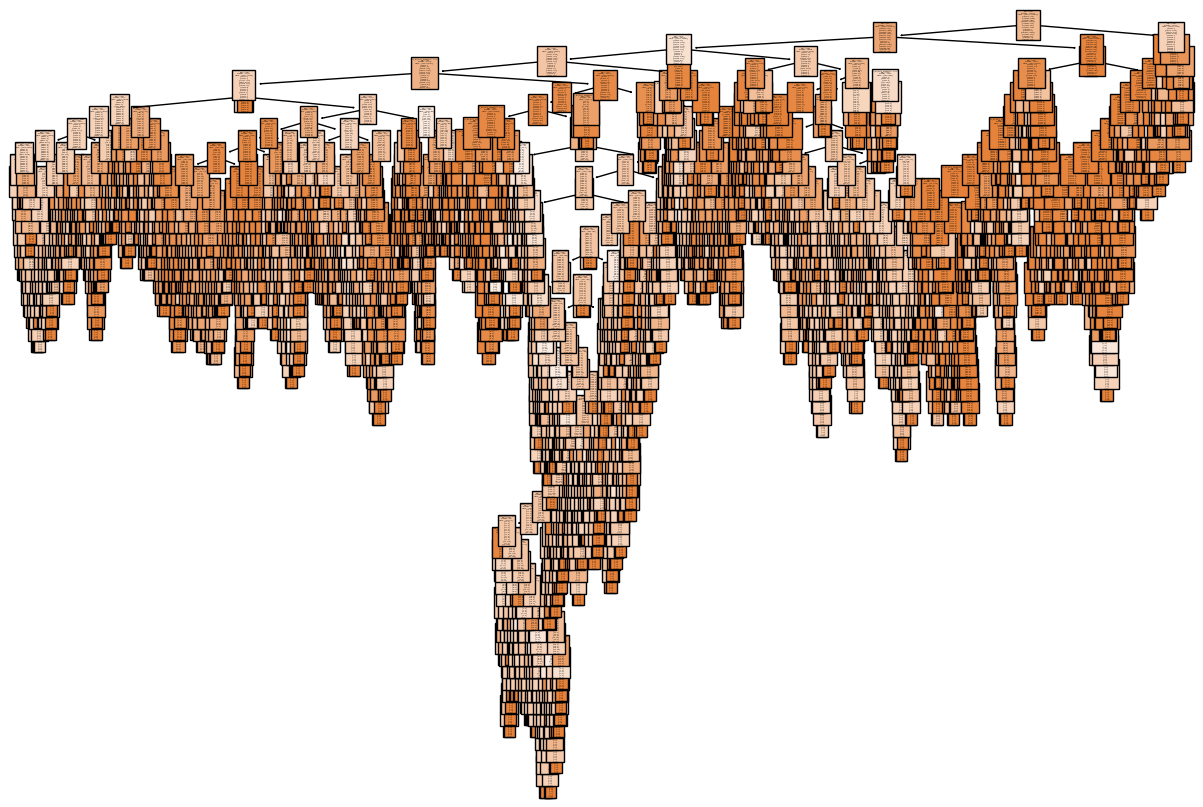

In [30]:
# Plot the decision tree as a figure
plt.figure(figsize=(15, 10))  #
plot_tree(DT_clf, feature_names=features, class_names=labels, filled=True)
plt.show()

# K-Nearest Neighbours

In [31]:
# Use 5-fold cross validation
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# Train final model
KNN_clf = KNeighborsClassifier(n_neighbors=3,n_jobs=-1,algorithm='kd_tree')
KNN_clf = KNN_clf.fit(X_train,y_train)
y_pred = KNN_clf.predict(X_test)

Confusion Matrix:


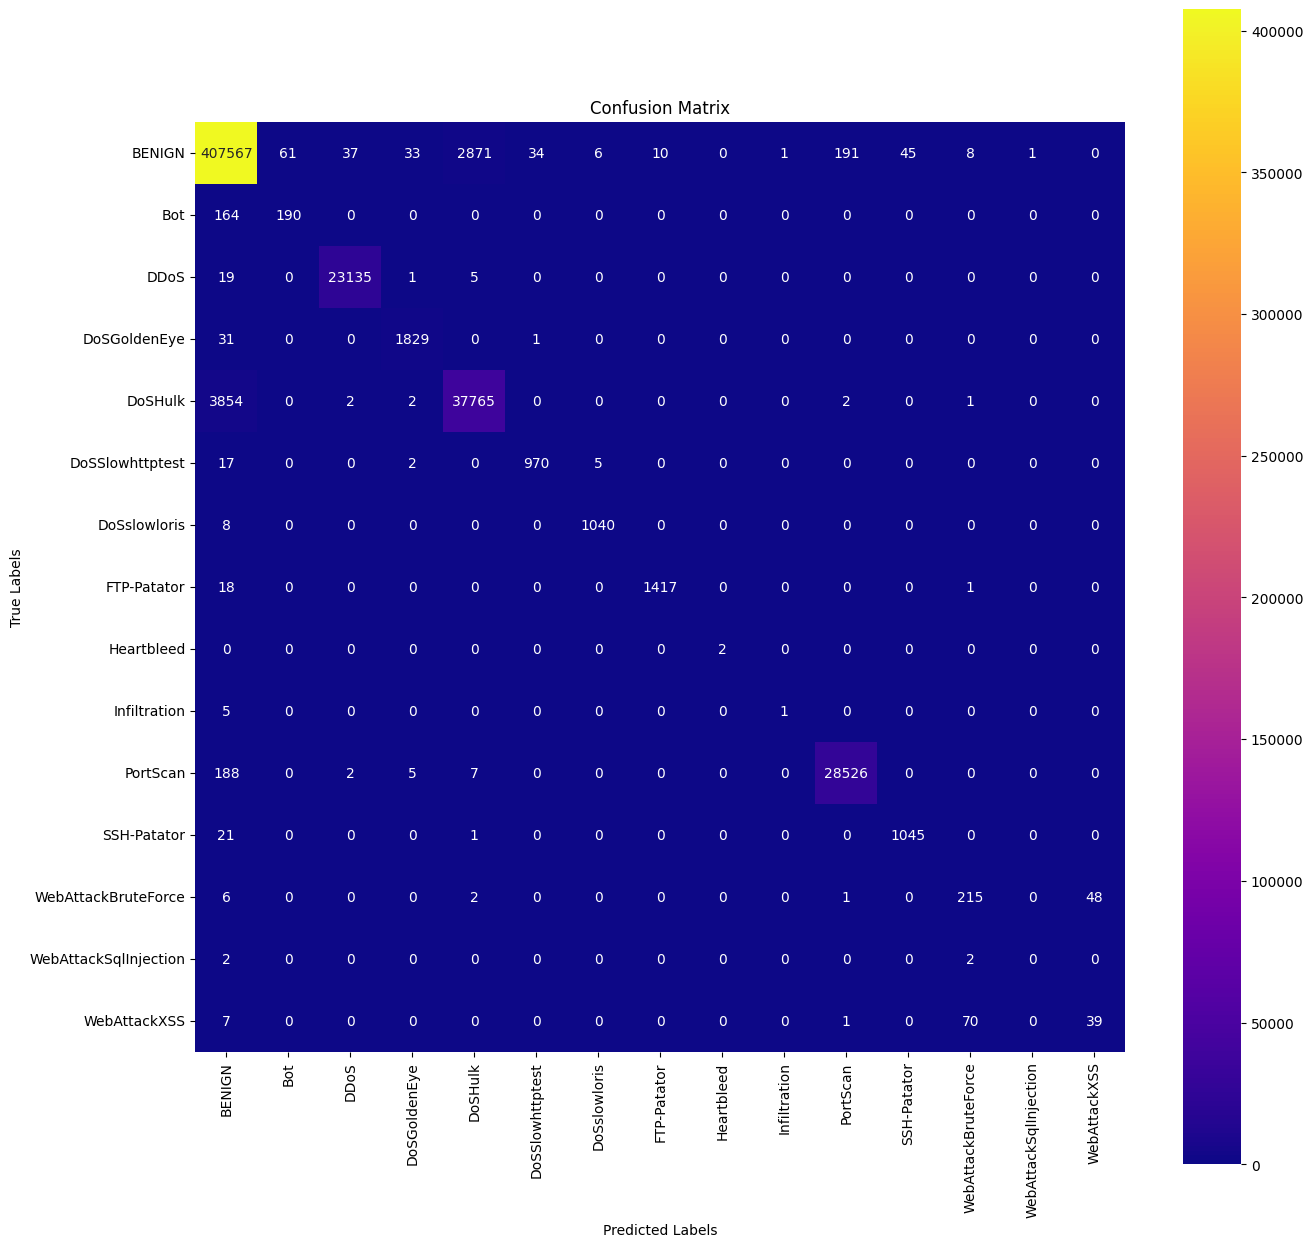

Total Accuracy:  98.47265121007155
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    410865
           1       0.76      0.54      0.63       354
           2       1.00      1.00      1.00     23160
           3       0.98      0.98      0.98      1861
           4       0.93      0.91      0.92     41626
           5       0.97      0.98      0.97       994
           6       0.99      0.99      0.99      1048
           7       0.99      0.99      0.99      1436
           8       1.00      1.00      1.00         2
           9       0.50      0.17      0.25         6
          10       0.99      0.99      0.99     28728
          11       0.96      0.98      0.97      1067
          12       0.72      0.79      0.76       272
          13       0.00      0.00      0.00         4
          14       0.45      0.33      0.38       117

   micro avg       0.98      0.98      0.98    511540
   macro avg       0.81

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
perf_evaluation(y_test,y_pred,labels)

In [ ]:
perf_evaluation(y_test,y_pred,labels)

# Random Forest

In [12]:
# Use 5-fold cross validation
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_split=2, random_state=0,verbose=2)

In [13]:
# Train final model
RF_clf = RF_clf.fit(X_train,y_train)
y_pred = RF_clf.predict(X_test)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed: 17.0min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

AttributeError: ignored

In [14]:
y_pred = RF_clf.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.3min


Confusion Matrix:


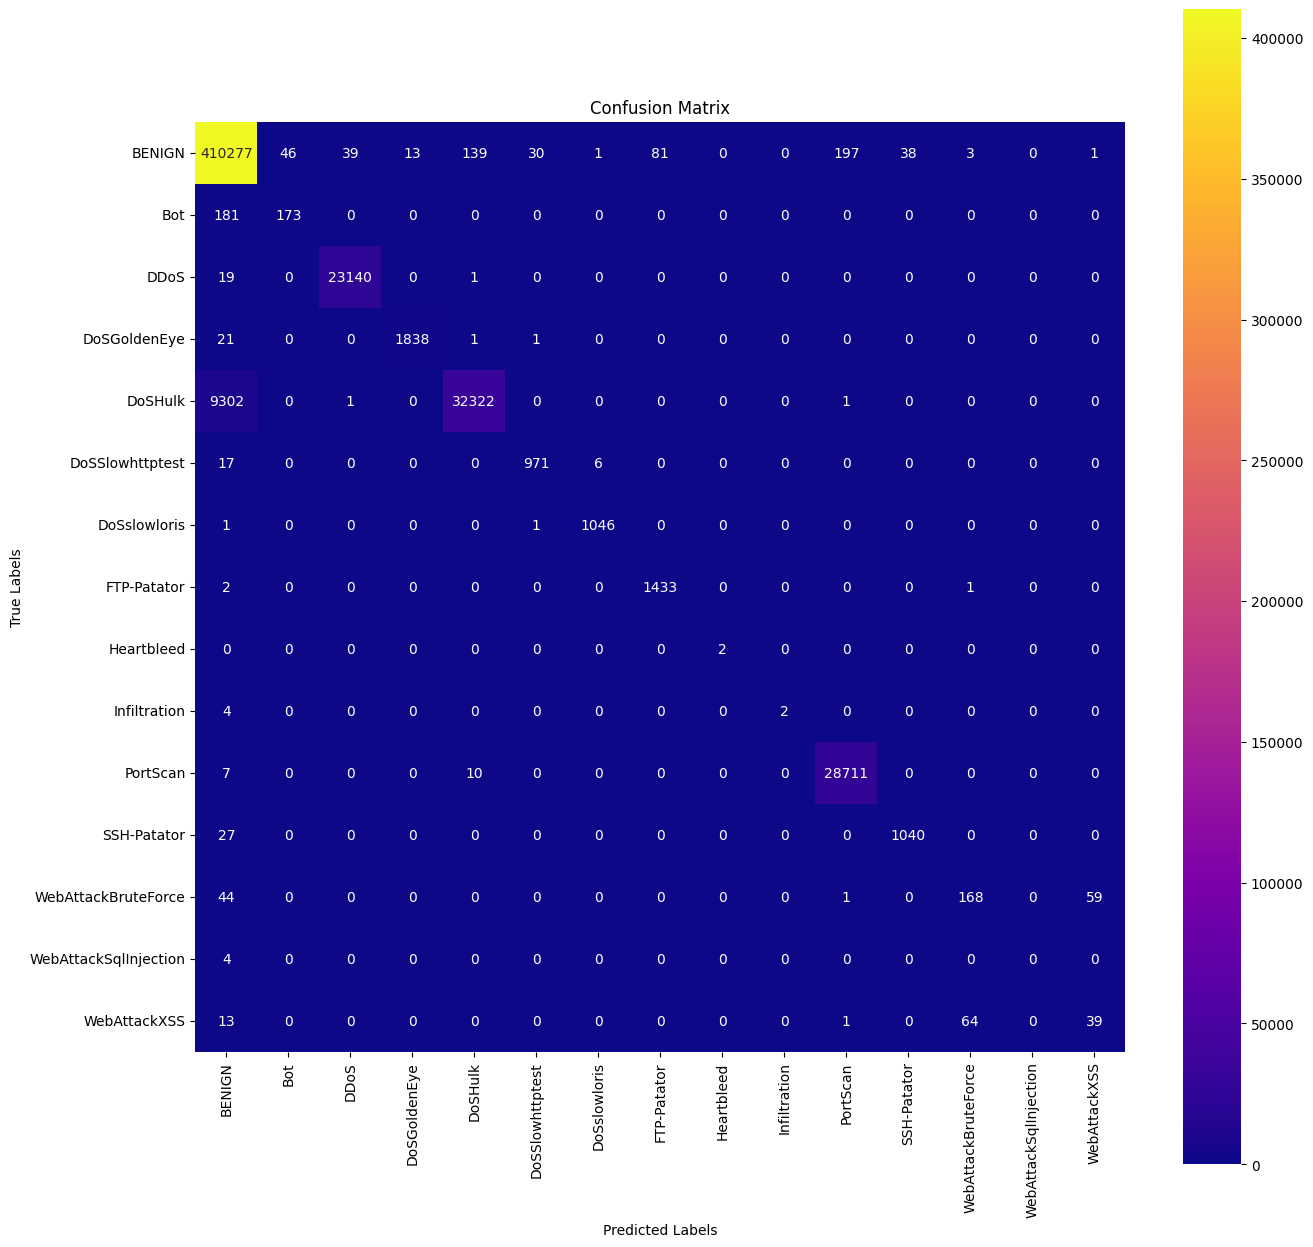

Total Accuracy:  97.96809633655236


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    410865
           1       0.79      0.49      0.60       354
           2       1.00      1.00      1.00     23160
           3       0.99      0.99      0.99      1861
           4       1.00      0.78      0.87     41626
           5       0.97      0.98      0.97       994
           6       0.99      1.00      1.00      1048
           7       0.95      1.00      0.97      1436
           8       1.00      1.00      1.00         2
           9       1.00      0.33      0.50         6
          10       0.99      1.00      1.00     28728
          11       0.96      0.97      0.97      1067
          12       0.71      0.62      0.66       272
          13       0.00      0.00      0.00         4
          14       0.39      0.33      0.36       117

   micro avg       0.98      0.98      0.98    511540
   macro avg       0.85      0.77      0.79    511540
weig

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
perf_evaluation(y_test,y_pred,labels)

# Support Vector Machine

In [16]:
# Use 5-fold cross validation
from sklearn import svm
SVM_clf = svm.SVC()


In [ ]:
# Train final model
SVM_clf = SVM_clf.fit(X_train,y_train)
y_pred = SVM_clf.predict(X_test)

In [ ]:
perf_evaluation(y_test,y_pred,labels)

# Feed Forward Neural Network

In [20]:
# Ues 5-fold cross validation
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(solver='sgd', alpha=1e-4,hidden_layer_sizes=(20,18), random_state=1,verbose=2)

In [21]:
# Train final model
MLP_clf = MLP_clf.fit(X_train,y_train)
y_pred = MLP_clf.predict(X_test)

Iteration 1, loss = 0.80938336
Iteration 2, loss = 0.59170655
Iteration 3, loss = 0.53548679
Iteration 4, loss = 0.50556748
Iteration 5, loss = 0.48321134
Iteration 6, loss = 0.46443351
Iteration 7, loss = 0.44899190
Iteration 8, loss = 0.43756044
Iteration 9, loss = 0.42969449
Iteration 10, loss = 0.42346736
Iteration 11, loss = 0.41828865
Iteration 12, loss = 0.41362352
Iteration 13, loss = 0.40912254
Iteration 14, loss = 0.40466239
Iteration 15, loss = 0.39928703
Iteration 16, loss = 0.39374762
Iteration 17, loss = 0.38710350
Iteration 18, loss = 0.37700440
Iteration 19, loss = 0.36470732
Iteration 20, loss = 0.35208049
Iteration 21, loss = 0.33894750
Iteration 22, loss = 0.32699936
Iteration 23, loss = 0.31696649
Iteration 24, loss = 0.30908696
Iteration 25, loss = 0.30322146
Iteration 26, loss = 0.29893883
Iteration 27, loss = 0.29525872
Iteration 28, loss = 0.29212153
Iteration 29, loss = 0.28958474
Iteration 30, loss = 0.28738844
Iteration 31, loss = 0.28553284
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:


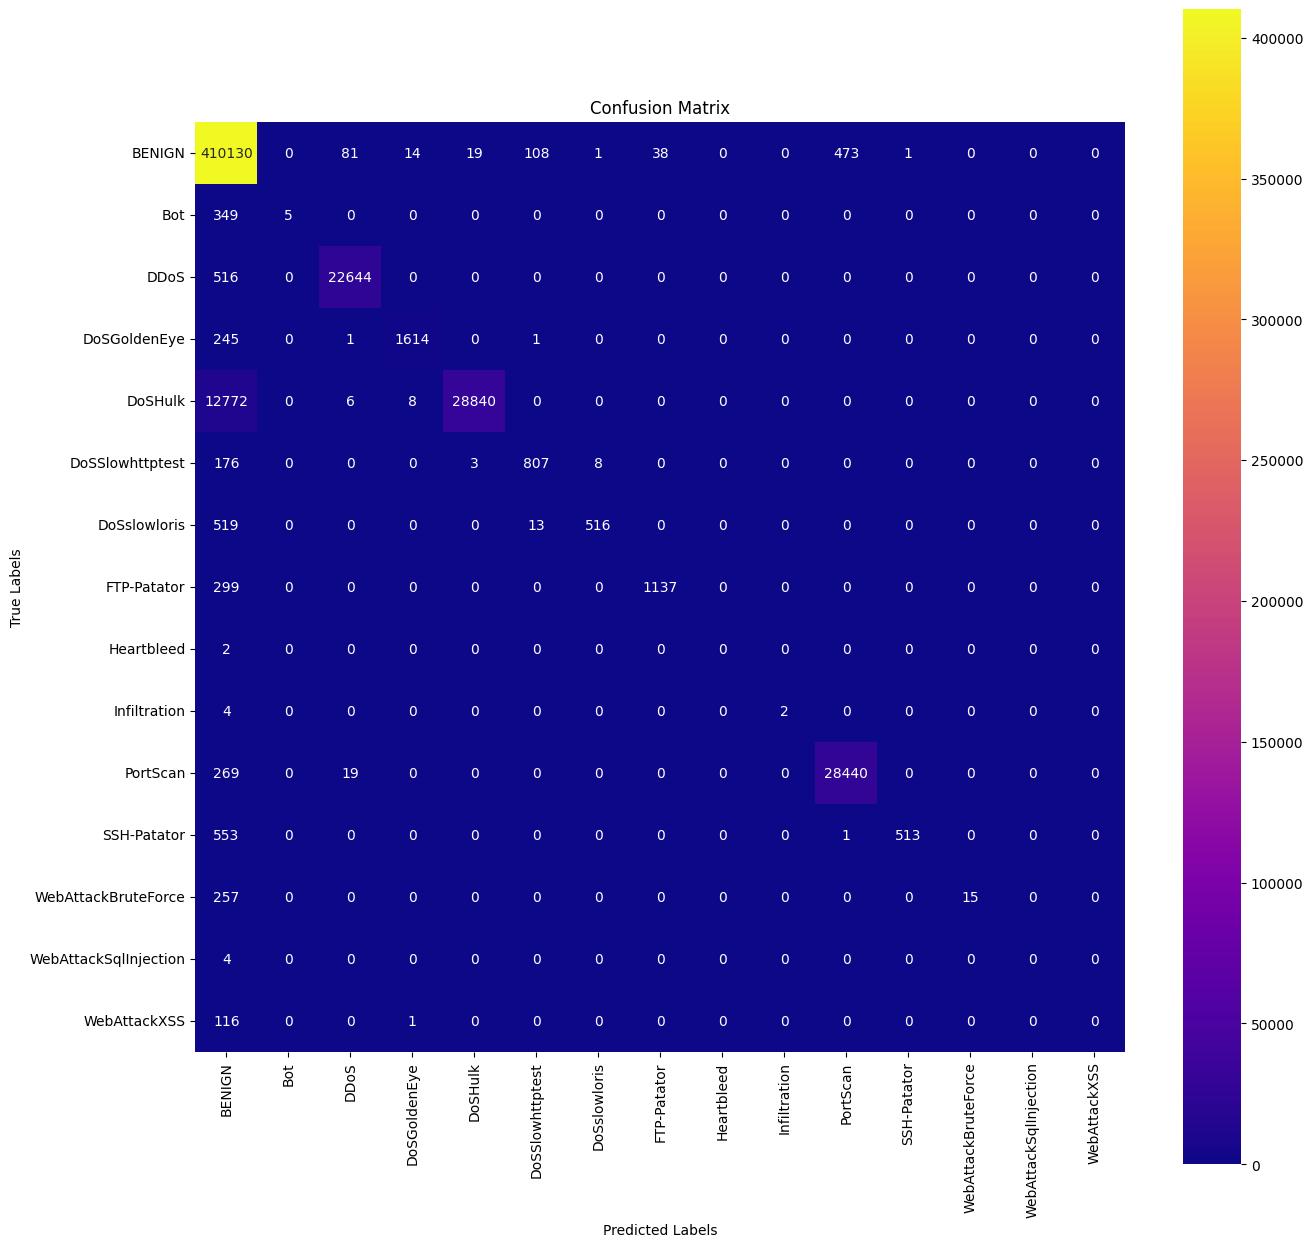

Total Accuracy:  96.3778003675177


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    410865
           1       1.00      0.02      0.03       354
           2       0.99      0.98      0.99     23160
           3       0.96      0.92      0.94      1861
           4       1.00      0.69      0.82     41626
           5       0.85      0.84      0.84       994
           6       0.89      0.50      0.64      1048
           7       0.95      0.79      0.86      1436
           8       0.00      0.00      0.00         2
           9       1.00      0.33      0.50         6
          10       0.98      0.99      0.99     28728
          11       0.99      0.48      0.65      1067
          12       1.00      0.06      0.10       272
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00       117

   micro avg       0.97      0.97      0.97    511540
   macro avg       0.77      0.51      0.56    511540
weig

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
perf_evaluation(y_test,y_pred,labels)